# Team backpropagate<br>                  
Group Members:<br>
+ Zahra Hoobakht

# Table of Contents
* [ Introduction ](#0)
* [1. Business Understanding](#1)
       
* [2. Data preparation](#2)


* [3. Data Reduction](#3)
 * [3.1 Data Normalization](#3.1)
* [4. Dimensional reduction](#4)
 * [4.1 Principle Components Analysis  (PCA)](#4.1)
 * [4.2 Randomized Principle Components Analysis (RPCA)](#4.2)
 * [4.3 Daisy](#4.3)

      * [   4.3-1 K-Nearest Neighbor Classification with each Feature Space](#4.3.1)
      *  [   4.3-2 Daisy Nearest neighbor classifier crosstab](#4.3-2)
 * [4.4 Gradient Method](#4.4)
 * [4.5 Key point matching for DAISY features](#4.5)
 * [4.6 Gabor kernel](#4.6)
      *  [4.6-1 Gabor kernel Nearest neighbor classifier crosstab](#4.6.1)
* [5. conclusion](#5)

* [ References](#X)

# Introduction

The task of classifying images into different categories such as **building, forest, mountain and sea** is a popular application of computer vision. This type of image classification can be performed using machine learning algorithms that are trained on large datasets of labeled images.An image classification application is a type of artificial intelligence (AI) application that uses machine learning algorithms to automatically classify and categorize images based on their visual content. It's an essential tool for many industries that need to organize, sort and analyze large amounts of visual data, such as advertisment, travel agencies and social media.

# 1.Business Understanding

In this lab, Natural landscapes images using Intel Image Classification (CNN - Keras) Dataset will be categorized and classified: <br> URL:https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras/notebook  

Natural landscapes image classification can be a useful technique for travel agencies to categorize and target their advertisements based on customers' interests in specific types of landscapes. Here are a few ways in the importance of image classification for the travel agency advertisements based on customers' interests in natural landscapes:

**Forests**: Image classification can be used to categorize images of forests based on factors such as tree species, foliage colors, and hiking or camping activities. This can be useful for creating targeted advertisements for customers who are interested in exploring forest landscapes and activities such as hiking or camping.

**Mountains**: Image classification can be used to categorize images of mountains based on factors such as height, scenery, and activities such as skiing or hiking. This can be useful for creating targeted advertisements for customers who are interested in mountain landscapes and activities such as skiing, snowboarding, or hiking.


**sea**: Image classification can be used to categorize images of seas based on factors such as location, water clarity, and activities such as fishing or boating. This can be useful for creating targeted advertisements for customers who are interested in visiting seas and exploring the natural landscapes and activities available.

**buildings**:Image classification can be used to identify and categorize images that showcase the cultural features of a destination, such as historical landmarks, museums, or local festivals. This can be useful for creating advertisements that highlight the unique cultural experiences that a travel destination has to offer.

By using image classification to categorize natural landscapes images based on customers' interests, travel agencies can create targeted advertisements that speak directly to potential customers and drive more bookings and revenue. This can help travel agencies to build strong customer relationships based on shared interests and values and stand out in a crowded marketplace.
Accuracy in the prediction tasks can bring higher benefit to the travel agencies and It can help the customers find the destination they are looking for to spend a good time in there but wrong predictions usually would not be harmful. In the worst case, it causes a minor financial loss and wasting time. 

# 2.Data Preparation 


loading data and necessary library packages

In [1]:
#%pip install opencv-contrib-python
#%pip install opencv-python
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from plotly.graph_objs import Bar, Line
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
import os
import cv2
import glob
from sklearn.decomposition import PCA
import random
from sklearn.preprocessing import StandardScaler
from ipywidgets import widgets
import warnings
from ipywidgets import fixed
import copy
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from skimage.feature import daisy
from skimage.io import imshow
from skimage.filters import sobel_h, sobel_v

in the original dataset existed classes are **building, forest, glacier, mountain, sea and street** due to saving time, memory and make them more recognizable and simpler I choosed **building, forest, mountain and sea  classes.** <br><br>

At first, I am loading the data by reading all the images in all folders and convert them to numpy array so I can see them as array and perfrom statistical normalization. then I am changing the color to the grayscale because our task is to regonize different landscape categories which are recognizable even without having colors and basicly we just need to classfy based on shape of the things and edges. changing to grayscale helps reduce the data to 1/3 size of RGB data. If I was working with the original classes, I need color to differentiate between mountain and glacier.Also our data should be normalized in order to have the same size pictures. in this way, different sizes, different light intensity and different spatial locations do not have any effect on classification

In [2]:
class_names = [ "buildings", "forest", "mountain", "sea"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
keys = list(class_names_label.keys())  
values = list(class_names_label.values())  
class_names_label 

{'buildings': 0, 'forest': 1, 'mountain': 2, 'sea': 3}

In [3]:
DataDir=r'C:\Users\Hedieh\Documents\SMU\ML-Py\Lab2'
Categories=["buildings", "forest", "mountain", "sea" ]
img_size=80
images=[]
images_flat=np.zeros((9248,img_size*img_size))
labels=[]
#df = pd.DataFrame(columns=range(0, (img_size*img_size)))
i=0
for category in Categories:
    path=os.path.join(DataDir,category)
    class_num=class_names_label[category]
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        image=cv2.resize(image,(img_size,img_size))
        image_flat=image.flatten()
        
        images.append(image)
        images_flat[i]=(image_flat.reshape(1,img_size*img_size))
        
        i+=1
        #df.loc[img]=pd.Series(image_flat[i] for i in range(0, (img_size*img_size)))
        labels.append(class_num)
    

I reduced the size of images to (80*80) To reduce the number of primary features while keeping them in recognizable quality . Now I want to visualize some random pictures with their labels

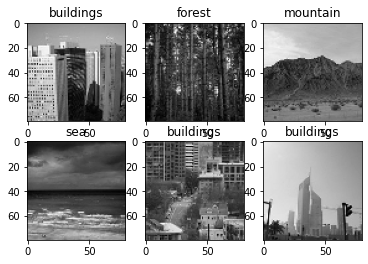

In [4]:
a=random.sample(range(0, 9248), 6)
rows=2
col=3
fig=plt.figure()
i=1
for j in a:

    ax=fig.add_subplot(rows,col,i)
    plt.imshow(images[j],cmap='gray')
    ax.title.set_text(str(keys[values.index(labels[j])]))
    i+=1
    

# 3.Data Reduction

## 3.1 Data Normalization
at first we have to normalize our data.  Image normalization can help reduce the impact of illumination variations on the image features. This is particularly important in tasks such as object recognition and detection, where lighting conditions can vary widely. Also, PCA feature extraction algorithms assumes that the input features are centered and have a unit variance. Normalizing the image data can help ensure that the features extracted from the image have these properties.
Furthermore,Normalizing image data can help ensure that different images are comparable in terms of their pixel values. This is important when working with images that have different resolutions or dynamic ranges.

In [5]:
std = StandardScaler()
normalizedimage=std.fit_transform(images_flat)
normalizedimage

array([[ 1.59002011,  1.59348247,  1.59877814, ..., -0.6691798 ,
        -0.80617915, -0.44409406],
       [-0.33302965, -0.36131921, -0.38596944, ..., -0.91496786,
        -0.64704341, -0.30213194],
       [ 0.63572474,  0.62332164,  0.61364795, ...,  1.17423069,
         1.10344973,  1.11748926],
       ...,
       [-1.17165285, -1.1577199 , -1.12481708, ...,  0.15596585,
         0.20168054,  0.38993339],
       [ 1.05503635,  1.01428197,  1.04826421, ...,  1.38490617,
         1.66926569,  1.43690403],
       [-0.70896419, -0.56403939, -0.41494386, ..., -0.89741157,
        -0.80617915, -0.88772569]])

# 4. Dimensional reduction

## 4.1 Principle Components Analysis  (PCA)

PCA is a linear dimensionality reduction method that identifies the principal components that capture the maximum variance in the data. These principal components are then used to transform the original data into a lower-dimensional space. PCA is a widely used method for reducing the dimensionality of high-dimensional datasets and is well-suited for datasets with a linear structure.

**Questions:**how varient is our data and how many features I need to extract to recover images in lower dimension?

In [6]:
def plot_explained_variance(pca):

    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
X = normalizedimage       
n_components=1000
pca = PCA(n_components=n_components)
X_pca = pca.fit(X)
plot_explained_variance(pca)


This graph shows that lower dimension contains the main features of the image, such as edges which are essential for classification and recognition of things in images. increasing dimension adds more details to the image, which sometimes cannot be recognized by the human eye. here number of 1000 feature has been chosen and I want to investigate whether restored image is recognizable or not.


In [7]:

pca = PCA(n_components=n_components)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)
X_pca

array([[ 8.20195160e+01, -3.79321871e+01,  1.34603878e+00, ...,
         3.30423189e-01,  4.02517188e-01, -3.67472420e-01],
       [ 3.05308172e+01, -1.94282729e+01,  7.50057721e+00, ...,
        -6.81149587e-02,  9.89268326e-02,  2.97275197e-01],
       [ 6.56935853e+00,  2.02771797e+01, -4.25730407e+01, ...,
         5.12727041e-02, -5.21325108e-01, -1.79199182e-01],
       ...,
       [-7.97095186e+00,  7.03832877e+01,  6.55014984e+00, ...,
         4.21542014e-01,  2.56852597e-01,  5.87833546e-01],
       [ 8.67404939e+01,  5.57879426e+01, -4.89363769e-01, ...,
         7.06077521e-01, -5.54399588e-02,  6.31171889e-01],
       [ 5.30989778e+00, -1.27880856e+01,  2.07032684e+01, ...,
        -6.65688333e-02,  3.66122871e-01,  4.86191823e-01]])


These are the Egien Vectors for number of 1000 components which show our converted dimension with the highest variance that I can classify my image data easier. 

In [8]:
# lets do some PCA of the features and go from 1850 features to 20 features


print ("Extracting the top %d eigenimage from %d images" % (n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenimage = pca.components_.reshape((n_components,img_size,img_size))

Extracting the top 1000 eigenimage from 9248 images
Wall time: 57 s


here 1000 eigenimages have been extracted using pca which contains images' basic features and 30.8 seconds is taken to extract all the requested features

In [9]:
# get some of the specifics of the dataset

y =  labels
names = class_names_label

n_samples, n_features = X.shape
h=img_size
w=img_size
n_classes = len(names)

print(np.sum(~np.isfinite(X)))
print("n_samples: {}".format(n_samples),"   total number of our images")
print("n_features: {}".format(n_features),"  total number of features after reduction and flattening data")
print("n_classes: {}".format(n_classes),"      total number of categories/classes I am investigating")



0
n_samples: 9248    total number of our images
n_features: 6400   total number of features after reduction and flattening data
n_classes: 4       total number of categories/classes I am investigating


**Questions:** is it possible to rebuilt and claasify the image in lower dimension using 1000 features?

Text(0.5, 0.98, 'Original selected images before performing any dimensional reduction technics')

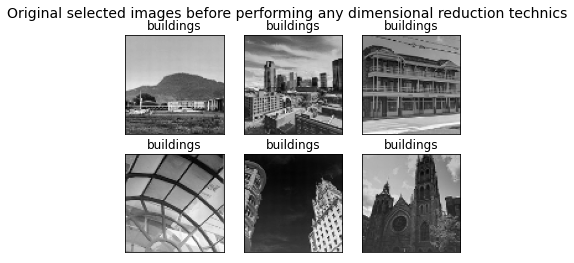

In [10]:
# a helper plotting function
def plot_gallery(images,titles, h, w, n_row=2, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure()
    #plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        plt.title(str(keys[values.index(titles[i])]), size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X,labels, h, w)
plt.suptitle('Original selected images before performing any dimensional reduction technics', size=14)

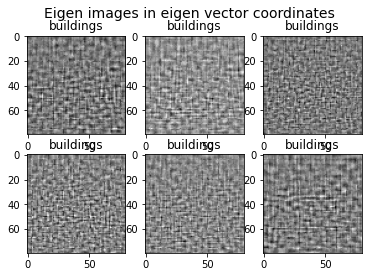

In [11]:
rows=2
col=3
a=random.sample(range(0, eigenimage.shape[0]), col*rows)

fig=plt.figure()
i=1
for j in a:
    ax=fig.add_subplot(rows,col,i)
    plt.imshow(eigenimage[j],cmap='gray')
    plt.suptitle('Eigen images in eigen vector coordinates', size=14)
    ax.title.set_text(str(keys[values.index(labels[j])]))
    i+=1

this cell shows the eigen images in the eigen vectors coordinates

In [12]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 1    
X_idx = images[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

in this cell we transform our eigen images from eigen vector coordinates to the original coordinates

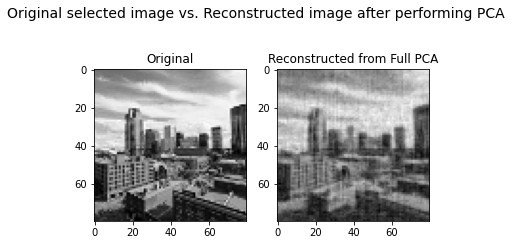

In [13]:
plt.subplot(1,2,1)
plt.imshow(X_idx, cmap='gray')
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((img_size, img_size)), cmap='gray')
plt.title('Reconstructed from Full PCA')
plt.suptitle('Original selected image vs. Reconstructed image after performing PCA', size=14)
plt.grid(False)

As a result, by reducing the dimension (reducing the number of features), the image can be restored and recognizable by human eye successfully.

**Question:** which method gives us the better resolution of our dataset images using same amount of features?

so let's investigate other methods

#  4.2 Randomized Principle Components Analysis (RPCA)

Randomized PCA is a variant of PCA that uses a randomized algorithm to identify the principal components. The randomized algorithm makes use of random projections to approximate the principal components of the data. This approach can be faster than traditional PCA, especially for high-dimensional datasets, while still producing accurate results.

In [14]:
def plot_explained_variance(rpca):

    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = rpca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

rpca = PCA(n_components=n_components, svd_solver='randomized')
X_rpca = rpca.fit(X)
plot_explained_variance(rpca)

This graph shows that lower dimension contains the main features of the image, such as edges which are essential for classification and recognition of things in images. increasing dimension adds more details to the image, which sometimes cannot be recognized by the human eye. here number of 1000 feature has been chosen randomly and I want to investigate whether restored image is recognizable or not.

In [15]:
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(X.copy())
eigenimage = rpca.components_.reshape((n_components, h, w))

Extracting the top 1000 eigenfaces from 9248 faces
Wall time: 46 s


here 1000 eigenimages have been extracted using rpca which contains images' basic features and 31.4 seconds is taken to extract all the requested features

Text(0.5, 0.98, 'random selected Eigen images in eigen vector coordinates ')

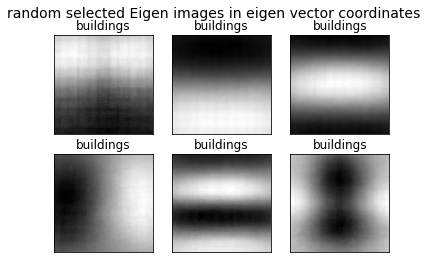

In [16]:
eigenimage_titles = [labels[i]   for i in range(eigenimage.shape[0])]
plot_gallery(eigenimage, eigenimage_titles, h, w)
plt.suptitle('random selected Eigen images in eigen vector coordinates ', size=14)

this cell shows the eigen images in the rpca eigen vectors coordinates

In [17]:
def plt_reconstruct(idx_to_reconstruct):
    # this code is for reference only, it does not qualify as a neaarest neighbor search
    #  for your lab project. 
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    x_flat = X[idx_to_reconstruct].reshape(1, -1)
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat.copy()))    
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat.copy()))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1) # original
    plt.imshow(x_flat.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(str(keys[values.index(labels[idx_to_reconstruct])])+f", {x_flat.shape[1]} elements")
    
    plt.grid(False)
    
    plt.subplot(1,3,2) # pca
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Full PCA, {n_components} elements")
    plt.grid(False)
    
    plt.subplot(1,3,3) # randomized pca
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f"Randomized PCA, {n_components} elements")
    plt.grid(False)
    plt.suptitle('comparison between Original image, Full PCA and Randomized PCA', size=14)
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)


interactive(children=(IntSlider(value=4623, description='idx_to_reconstruct', max=9247), Output()), _dom_class…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

We can see that our Full PCA and Randomized PCA methods have very close results (even the same quality to the human eye)<br>

In [18]:
X_pca_features = pca.transform(copy.deepcopy(X))
X_rpca_features = rpca.transform(copy.deepcopy(X))
# init a classifier for each feature space
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_rpca = KNeighborsClassifier(n_neighbors=1)

# separate the data into train/test
pca_train, pca_test, rpca_train, rpca_test, y_train, y_test = train_test_split(
    X_pca_features,X_rpca_features, y, test_size=0.2, train_size=0.8)

# fit each classifier
knn_pca.fit(pca_train,y_train)
acc_pca = accuracy_score(knn_pca.predict(pca_test),y_test)

knn_rpca.fit(rpca_train,y_train)
acc_rpca = accuracy_score(knn_rpca.predict(rpca_test),y_test)

# report accuracy
print(f"PCA accuracy:{100*acc_pca:.2f}%, RPCA Accuracy:{100*acc_rpca:.2f}%".format())

PCA accuracy:41.78%, RPCA Accuracy:41.78%


In [19]:
x_flat = X[idx_to_reconstruct].reshape(1, -1)
reconstructed_image = pca.inverse_transform(pca.transform(x_flat.copy()))    
reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat.copy()))
error_loss_PCA = np.sum((X_idx - reconstructed_image.reshape((img_size, img_size))) ** 2, axis=1).mean()
error_loss_RPCA = np.sum((X_idx - reconstructed_image_rpca.reshape((img_size, img_size))) ** 2, axis=1).mean()
print(error_loss_PCA)
print(error_loss_RPCA)

1750721.9547599219
1750721.2936538341


To compare the performance of PCA and Randomized PCA in representing images with fewer components, we can use a quantitative metric such as reconstruction error and K-nearest neighbors accuracy. The reconstruction error measures the difference between the original image and the image reconstructed using the reduced dimensional representation. A lower reconstruction error indicates a better representation of the image with fewer components. The K-nearest neighbors accuracy measures how accurate our methods can classify images in the same category as the nearest neighbor. our results show that randomized PCA is slightly better than PCA.
In practice, Randomized PCA often produces similar results to traditional PCA while being faster and more memory-efficient. However, the performance of both methods can vary depending on the dataset and the specific application.

**Question:** As RPCA is more accurate than Full PCA, How good RPCA method is in finding other images in the same category using pairwise distance?

In [20]:
# find the pairwise distance between all the different image features


dist_matrix_rpca = pairwise_distances(copy.deepcopy(X_rpca_features),
                                     metric="seuclidean")

                                       
# put it together inside a nice widget
def closest_image(dmat_rpca, idx1):
    
    # NOTE: this will NOT suffice for evaluation of a nearest neighbor classifier for your lab assignment
    distances = copy.deepcopy(dmat_rpca[idx1,:]) # get all image distances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances) #pca
    
    distances[idx2] = np.infty # dont pick the same image!
    idx3 = np.argmin(distances) # pixels
    
    #plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    plt.imshow(X[idx1].reshape((h,w)),cmap=plt.cm.gray)
    plt.suptitle('comparison between Original image and two closest neighbors using PCA', size=14)
    plt.title("Original:"+str(keys[values.index(labels[idx1])]))
    plt.grid(False)

    plt.subplot(1,3,2)
    plt.imshow(X[idx2].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Closest:"+str(keys[values.index(labels[idx2])]))
    plt.grid(False)
    
    plt.subplot(1,3,3)
    plt.imshow(X[idx3].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Next Closest:"+str(keys[values.index(labels[idx3])]))
    plt.grid(False)
    
widgets.interact(closest_image,idx1=(0,n_samples-1,1),
                 dmat_rpca=fixed(dist_matrix_rpca),
                 __manual=True)

interactive(children=(IntSlider(value=4623, description='idx1', max=9247), Output()), _dom_classes=('widget-in…

<function __main__.closest_image(dmat_rpca, idx1)>

Our results show that although RPCA can recognize some of the same categories' pictures it is not very accurate for classifying all the pictures. So we need to investigate other methods to have better classification 

# 4.3 DAISY

The daisy algorithm is a computer vision algorithm that is used to detect keypoints in an image.The algorithm works by first computing a scale-space representation of the image, which is a series of images at different scales. Then, for each pixel in each scale, the algorithm computes the difference of Gaussian (DoG) between adjacent scales. The DoG is a measure of the difference in intensity between two neighboring pixels in the image.The algorithm then looks for extrema in the DoG response, which are points where the DoG is either a maximum or a minimum with respect to both spatial and scale dimensions. These extrema are potential keypoints.

To eliminate unstable keypoints, the algorithm performs a series of tests based on the local contrast and edge responses at each keypoint. The remaining keypoints are then assigned an orientation based on the gradient directions of nearby pixels, and a descriptor is computed based on the local image gradients around the keypoint.

In [21]:
idx_to_reconstruct = int(np.random.rand(1)*len(X))
img  = X[idx_to_reconstruct].reshape((h,w))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


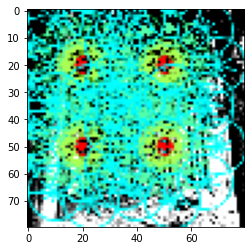

In [22]:
# lets first visualize what the daisy descriptor looks like
features, img_desc = daisy(img, 
                           step=30, 
                           radius=20, 
                           rings=3, 
                           histograms=9, 
                           orientations=9, 
                           visualize=True)
plt.imshow(img_desc)
plt.grid(False)

In [23]:
# now let's understand how to use it
features = daisy(img, step=30, radius=20, rings=3, histograms=9, orientations=9, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(2, 2, 252)
1008


1008 features have been extracted using Daisy method

In [24]:
# create a function to take in the row of the matrix and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=30, radius=20, 
                 rings=3, histograms=9, orientations=9, 
                 visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(h,w))
test_feature.shape

Wall time: 47.5 ms


(1008,)

Daisy algorithm is so fast working with higher dimension. It took 31ms to extract features

In [25]:
# apply to entire data, row by row,
# takes about a minute to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

Wall time: 5min 40s
(9248, 1008)


In [26]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

Wall time: 5.08 s


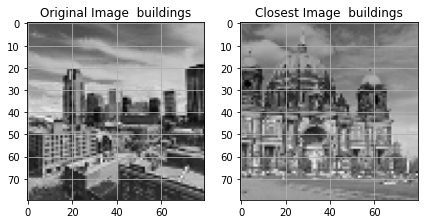

In [27]:

# find closest image to current image
idx1 = 1
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
plt.imshow(X[idx1].reshape((h,w)),cmap='gray')
plt.title("Original Image  "+str(keys[values.index(labels[idx1])]))
plt.grid()

plt.subplot(1,2,2)
plt.imshow(X[idx2].reshape((h,w)),cmap='gray')
plt.title("Closest Image  "+str(keys[values.index(labels[idx2])]))
plt.grid()

In [28]:

# put it together inside a nice widget
def closest_image(dmat_daisy, dmat_rpca, idx1):
    # NOTE: this will not suffice for evaluation 
    # of a nearest neighbor classifier for your lab assignment
    # do not use this code for satifying the lab assignment requirement
    
    distances = copy.deepcopy(dmat_daisy[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances = copy.deepcopy(dmat_rpca[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    plt.imshow(X[idx1].reshape((h,w)),cmap='gray')
    plt.title("Original:"+str(keys[values.index(labels[idx1])]))
    plt.grid()

    plt.subplot(1,3,2)
    plt.imshow(X[idx2].reshape((h,w)),cmap='gray')
    plt.title("DAISY Closest:"+str(keys[values.index(labels[idx2])]))
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.imshow(X[idx3].reshape((h,w)),cmap='gray')
    plt.title("PCA Closest:"+str(keys[values.index(labels[idx3])]))
    plt.grid()
    
widgets.interact(closest_image,idx1=(0,n_samples-1,1),
                 dmat_daisy=fixed(dist_matrix),
                 dmat_rpca=fixed(dist_matrix_rpca),
                 __manual=True)

interactive(children=(IntSlider(value=4623, description='idx1', max=9247), Output()), _dom_classes=('widget-in…

<function __main__.closest_image(dmat_daisy, dmat_rpca, idx1)>

Our results show that Daisy algorithm can recognize most of the same categories' pictures accurately

### 4.3-1 K-Nearest Neighbor Classification with each Feature Space

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# init a classifier for each feature space
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_dsy = KNeighborsClassifier(n_neighbors=1)

# separate the data into train/test
pca_train, pca_test, dsy_train, dsy_test, y_train, y_test = train_test_split(
    X_pca_features,daisy_features, y, test_size=0.2, train_size=0.8)

# fit each classifier
knn_pca.fit(pca_train,y_train)
acc_pca = accuracy_score(knn_pca.predict(pca_test),y_test)

knn_dsy.fit(dsy_train,y_train)
acc_dsy = accuracy_score(knn_dsy.predict(dsy_test),y_test)

# report accuracy
print(f"PCA accuracy:{100*acc_pca:.2f}%, Daisy Accuracy:{100*acc_dsy:.2f}%".format())

PCA accuracy:42.49%, Daisy Accuracy:68.43%


### 4.3-2 Daisy Nearest neighbor classifier crosstab

In [30]:

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(dsy_train, y_train)

KNeighborsClassifier()

In [31]:

%%time

y_predict = neigh.predict(dsy_test)
print(y_predict)

[3 3 1 ... 1 2 2]
Wall time: 1.59 s


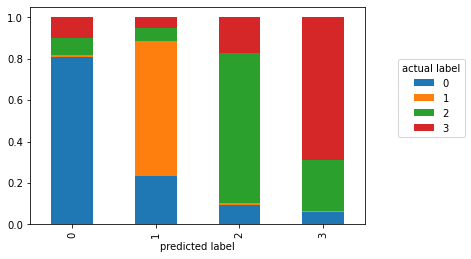

In [32]:
knn_class = pd.crosstab(y_predict, y_test, normalize = 'index')
knn_class.plot(kind='bar', stacked=True)
plt.legend(title='actual label',loc = (1.1, 0.4))
plt.xlabel('predicted label')

plt.show()

This graph shows corrolation between our data.also it can be seen that daisy algorithm could classify and recognize categorizes up to 70%. Most of the extracted features are relevant to the prediction task and it captures the most important information in the data.
Because our purpose of doing this image processing is to have travel agency advertising I think daisy algorithm could achieve to a good accuracy of data because accuracy in our data is not very important and 70% match is good for our data.

In [33]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy import stats

## 4.4 Gradient Method

C:\Users\Hedieh\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning:

Float image out of standard range; displaying image with stretched contrast.



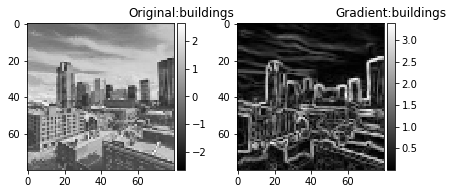

In [34]:

plt.subplot(1,2,1)
idx_to_reconstruct = 1
img  = X[idx_to_reconstruct].reshape((h,w))
imshow(img,cmap='gray')
plt.title("Original:"+str(keys[values.index(labels[idx_to_reconstruct])]))
plt.grid(False)


plt.subplot(1,2,2)
gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
imshow(gradient_mag,cmap='gray')
plt.title("Gradient:"+str(keys[values.index(labels[idx_to_reconstruct])]))
plt.grid(False)

this image shows gradient of the Image, as you can see all the edges can be seen very accurately and the image is recognizable

## 4.5 Key point matching for DAISY features

In [35]:
%%time

from skimage.feature import match_descriptors, plot_matches

# The index of the source image
idx1 = 0

# Let the first 500 images be the set of test images
num_matches = np.zeros(500)
for idx2 in range(0,500):
    if idx2 == idx1:
        continue
    #Source image
    descriptors1 = daisy_features[0].reshape((daisy_features.shape[1],1))
    #Test image
    descriptors2 = daisy_features[idx2].reshape((daisy_features.shape[1],1))
    
    # Use max_distance = 0.001 to limit the number of matches
    matches = match_descriptors(descriptors1, descriptors2, max_distance = 0.001, cross_check=True)
    
    #Record the number of matches for each test image
    num_matches[idx2] = matches.shape[0]

#Find the clostest image based on the number of matches
closest_idx = np.argmax(num_matches)

Wall time: 14.1 s


In [36]:
closest_idx

181

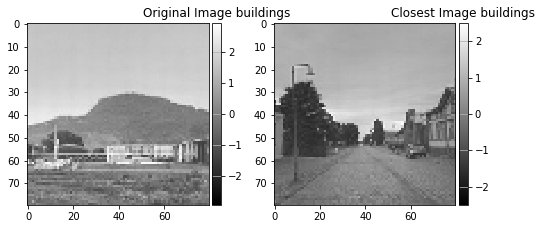

In [37]:
idx1 = 0
idx2 = closest_idx

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((h,w)),cmap='gray')
plt.title("Original Image "+str(keys[values.index(labels[idx1 ])]))
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((h,w)),cmap='gray')
plt.title("Closest Image "+str(keys[values.index(labels[idx2 ])]))
plt.grid()

## 4.6 Gabor kernel

In [38]:
# prepare filter bank kernels
kernels = []
for theta in range(8):# orientations
    theta = theta / 8. * np.pi
    for sigma in (1, 3, 5): # std
        for frequency in (0.05, 0.15, 0.25, 0.35): # frequency
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

In [39]:
          
# compute the filter bank and take statistics of image
# this can be drastically sped up using the 2D FFT
def compute_gabor(row, kernels, shape):
    feats = np.zeros((len(kernels), 4), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(row.reshape(shape), kernel, mode='wrap')
        _,_,feats[k,0],feats[k,1],feats[k,2],feats[k,3] = stats.describe(filtered.reshape(-1))
        # mean, var, skew, kurt
        
    return feats.reshape(-1)

idx_to_reconstruct = int(np.random.rand(1)*len(X))

gabr_feature = compute_gabor(X[idx_to_reconstruct], kernels, (h,w))
gabr_feature.shape
# takes some time to run entire dataset (using lots of orientations, std, and frequency)
print(gabr_feature.shape)
print(gabr_feature)


(384,)
[ 4.03099143e-01  5.44364412e-01 -2.67692766e-01 -1.15454515e+00
  2.71734039e-01  2.61840043e-01 -2.76669100e-01 -1.17474647e+00
  1.23229585e-01  6.83973713e-02 -2.98861322e-01 -1.06301406e+00
  3.79269588e-02  2.17978949e-02 -3.63313013e-01  3.48458704e+00
  2.71917703e-01  1.75973920e-01 -1.01239554e-01 -1.02695505e+00
  8.26201322e-03  6.79912249e-03  1.21118939e-01  2.59764677e+00
  4.05600360e-04  2.51223883e-03 -1.15210700e-02  3.05618108e+00
  3.50971245e-04  2.70617469e-03 -4.02558418e-01  5.65543420e+00
  1.22720856e-01  4.02060442e-02 -7.47083013e-02 -7.74059111e-01
  5.08636276e-04  2.80428108e-03  1.78515643e-02  1.54553719e+00
 -3.18743219e-04  1.06834271e-03  1.34826769e-02  2.73935782e+00
  1.72406963e-04  1.41370907e-03 -3.57284484e-01  4.43935748e+00
  4.03100932e-01  5.44438820e-01 -2.67808394e-01 -1.15453814e+00
  2.71806591e-01  2.61803045e-01 -2.77446562e-01 -1.17484214e+00
  1.23318066e-01  6.63457215e-02 -2.94616416e-01 -1.15196470e+00
  3.78159150e-02  

In [40]:
%time gabor_stats = np.apply_along_axis(compute_gabor, 1, X, kernels, (h,w))
print(gabor_stats.shape)

Wall time: 2h 1min 9s
(9248, 384)


In [41]:
knn_gab = KNeighborsClassifier(n_neighbors=1)

gab_train, gab_test, y_train, y_test = train_test_split(
    gabor_stats,y,test_size=0.2, train_size=0.8)
knn_gab.fit(gab_train,y_train)
acc_gab = accuracy_score(knn_gab.predict(gab_test),y_test)

print(f"Gabor accuracy: {100*acc_gab:.2f}%")

Gabor accuracy: 57.35%


In [42]:
%time dist_matrix = pairwise_distances((gabr_feature).reshape(-1, 1))

Wall time: 98.6 ms


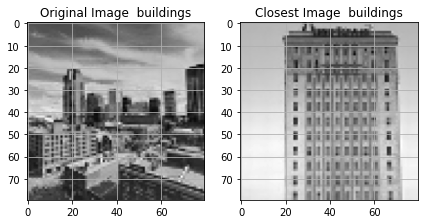

In [43]:
idx1 = 1
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
plt.imshow(X[idx1].reshape((h,w)),cmap='gray')
plt.title("Original Image  "+str(keys[values.index(labels[idx1])]))
plt.grid()

plt.subplot(1,2,2)
plt.imshow(X[idx2].reshape((h,w)),cmap='gray')
plt.title("Closest Image  "+str(keys[values.index(labels[idx2])]))
plt.grid()

### 4.6-1 Gabor kernel Nearest neighbor classifier crosstab 

In [44]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(gab_train, y_train)

KNeighborsClassifier()

In [45]:
%%time

y_predict = neigh.predict(gab_test)
print(y_predict)

[2 2 1 ... 1 1 2]
Wall time: 560 ms


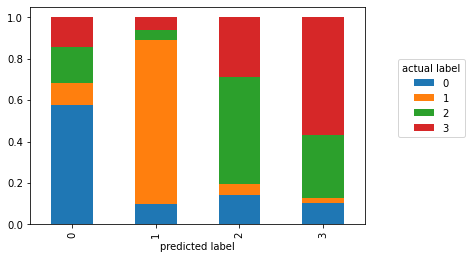

In [46]:
knn_class = pd.crosstab(y_predict, y_test, normalize = 'index')
knn_class.plot(kind='bar', stacked=True)
plt.legend(title='actual label',loc = (1.1, 0.4))
plt.xlabel('predicted label')

plt.show()

This graph shows that corrolation between our data. the gabor algorithm could classify and recognize categorizes up to 55% which is less than Daisy algorithm.This method does not able to discriminate between different classes or categories in the data and its prediction is so inaccurate.


## 5. Conclusion
Natural landscape image processing can be an effective tool for travel agencies looking to advertise their destinations to potential customers. By enhancing the beauty and visual impact of natural landscapes, image processing can help capture the attention of viewers and convey the unique features of a particular location.
To  better classify data, we need to reduce dimension in order to make process faster, improve the accuracy of predictive models, better visualization to make it easier to understand the relationships between variables .Our Image processing shows that Daisy dimensional reduction algorithm is computationally efficient and scalable to large datasets, making it practical for real-world applications. in our survey, Daisy shows accuracy of nearly 70% and has better performance in comparsion to other methods and works better for data analysis of travel agencies' advertisement.

## Reference
[1] Lecture videos

[2] Dr. Larson github codes